<a href="https://colab.research.google.com/github/AmbrishPathak/ML-Regression-Baseball-dataset/blob/main/ML_Regression_Baseball_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AmbrishPathak/ML-Regression-Baseball-dataset/main/mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [4]:
df.shape

(1034, 6)

In [2]:
#check if there are any null values in df

df.isnull().values.any()


True

In [3]:
df = df.dropna()

df.isnull().values.any()


False

In [4]:
df.shape

(1033, 6)

**Clean**

In [5]:
df.rename(index=str, columns={"Weight(pounds)": "Weight", "Height(inches)": "Height"}, inplace=True)
df.head()

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


**EDA**

In [6]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


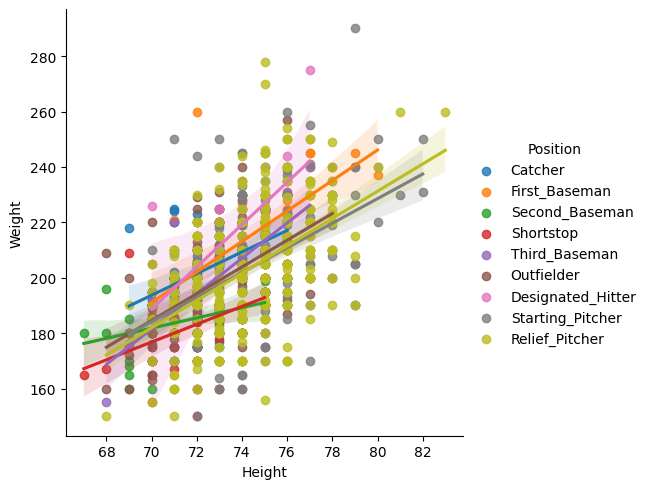

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="Height", y="Weight", data=df, hue ="Position")
plt.show()

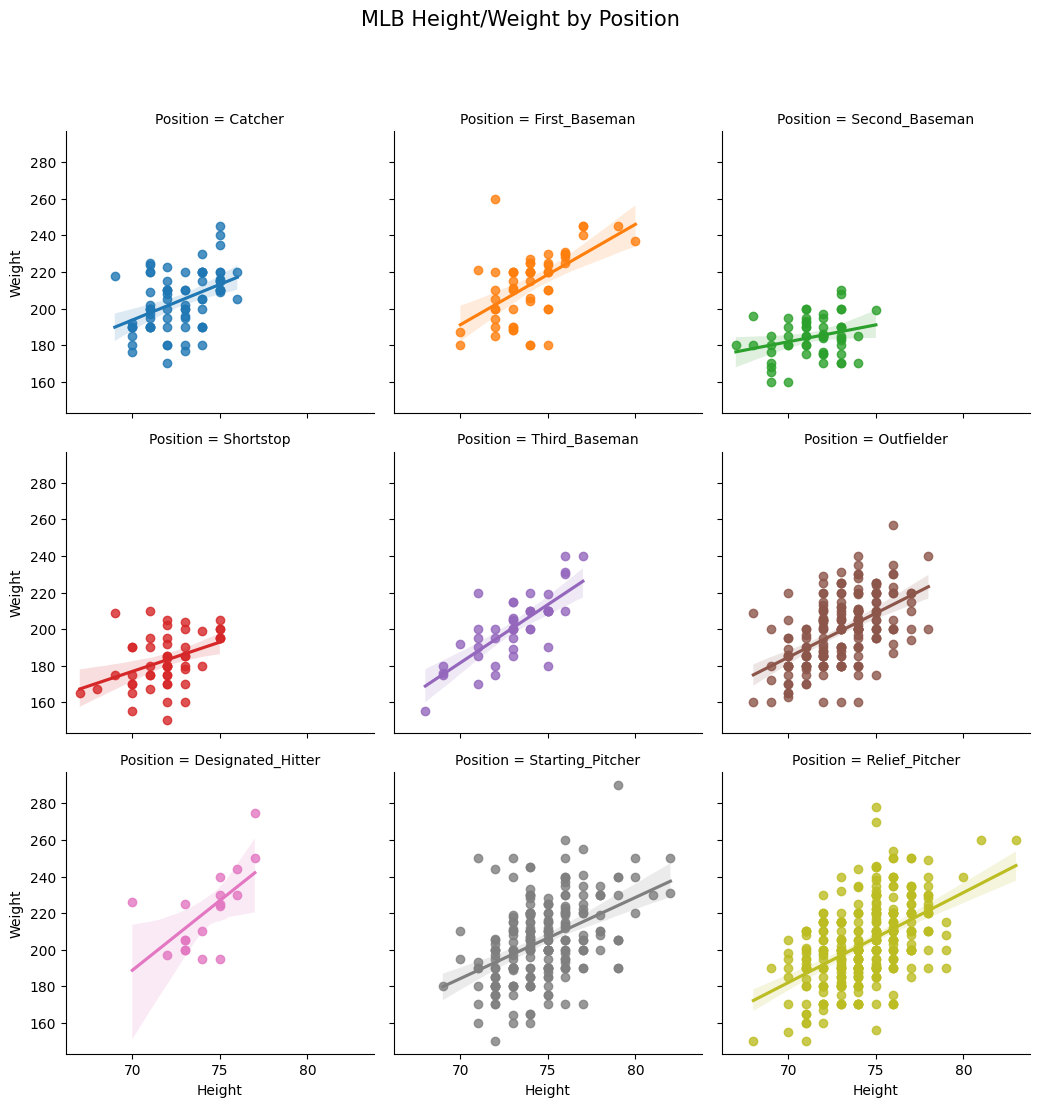

In [32]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position",fontsize=15, y=1.05)
g.map(sns.regplot, "Height", "Weight")

**Modeling**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**Select Feature**

In [15]:
var = df['Height'].values
var.shape

(1033,)

In [16]:
y = df['Height'].values #Target
y = y.reshape(-1,1)
X = df['Weight'].values #Feature
X = X.reshape(-1,1)

In [17]:
X.shape

(1033, 1)

In [18]:
y.shape

(1033, 1)

**Split data and scale data**

In [20]:
scaler = StandardScaler()

In [21]:
X_scaler = scaler.fit(X)
X

array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [22]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [23]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]])

In [24]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


**Fit the Model**

In [28]:
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [29]:
y_test.shape

(104, 1)

In [30]:
prediction.shape

(104, 1)

**Unscaled predictions, coverted to DataFrame and described**

In [32]:
df_predictions = pd.DataFrame(prediction)
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000
